# **Libraries & Read File**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [4]:
data = pd.read_csv('WalmartDataset.csv', encoding='windows-1254')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Data Transformation**

In [5]:
duplicates_sum = data["Row ID"].duplicated().sum()
if duplicates_sum > 0:
    print("There are duplicated values.")
else:
    print("There are no duplicated values.")

There are no duplicated values.


In [6]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64

In [7]:
data=data.dropna(axis=0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9922 non-null   int64  
 1   Order ID       9922 non-null   object 
 2   Order Date     9922 non-null   object 
 3   Ship Date      9922 non-null   object 
 4   Ship Mode      9922 non-null   object 
 5   Customer ID    9922 non-null   object 
 6   Customer Name  9922 non-null   object 
 7   Segment        9922 non-null   object 
 8   Country        9922 non-null   object 
 9   City           9922 non-null   object 
 10  State          9922 non-null   object 
 11  Postal Code    9922 non-null   int64  
 12  Region         9922 non-null   object 
 13  Product ID     9922 non-null   object 
 14  Category       9922 non-null   object 
 15  Sub-Category   9922 non-null   object 
 16  Product Name   9922 non-null   object 
 17  Sales          9922 non-null   float64
 18  Quantity

In [9]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
data.drop(['Row ID', 'Order ID','Customer ID', 'Customer Name', 'Country','Postal Code', 'Product ID', 'Product Name'], axis=1, inplace=True)

In [11]:
data.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/08/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,11/08/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,06/12/2016,06/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Order Month'] = data['Order Date'].dt.month
data['Ship Month'] = data['Ship Date'].dt.month
data.drop(['Order Date', 'Ship Date'], axis=1, inplace=True)

In [13]:
data["City"].value_counts()

New York City     902
Los Angeles       743
Philadelphia      537
San Francisco     501
Seattle           423
                 ... 
Murrieta            1
Jefferson City      1
Saint Peters        1
Santa Maria         1
Holyoke             1
Name: City, Length: 531, dtype: int64

In [14]:
data["State"].value_counts()

California              1982
New York                1109
Texas                    983
Pennsylvania             587
Washington               501
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           248
Virginia                 224
Arizona                  223
Colorado                 182
Tennessee                182
Georgia                  180
Indiana                  148
Kentucky                 138
Massachusetts            135
New Jersey               129
Oregon                   124
Maryland                 105
Wisconsin                103
Delaware                  96
Minnesota                 88
Connecticut               80
Oklahoma                  66
Missouri                  65
Arkansas                  60
Alabama                   59
Rhode Island              54
Mississippi               53
Utah                      52
South Carolina            42
Louisiana                 42
Nevada        

In [15]:
data['State'] = data['State'].str.lower()
data['City'] = data['City'].str.lower()
data['State'].value_counts()

california              1987
new york                1109
texas                    983
pennsylvania             587
washington               501
illinois                 490
ohio                     468
florida                  383
michigan                 254
north carolina           248
virginia                 224
arizona                  223
colorado                 182
tennessee                182
georgia                  180
indiana                  148
kentucky                 138
massachusetts            135
new jersey               129
oregon                   124
maryland                 105
wisconsin                103
delaware                  96
minnesota                 88
connecticut               80
oklahoma                  66
missouri                  65
arkansas                  60
alabama                   59
rhode island              54
mississippi               53
utah                      52
louisiana                 42
south carolina            42
nevada        

# **Data Exploration**

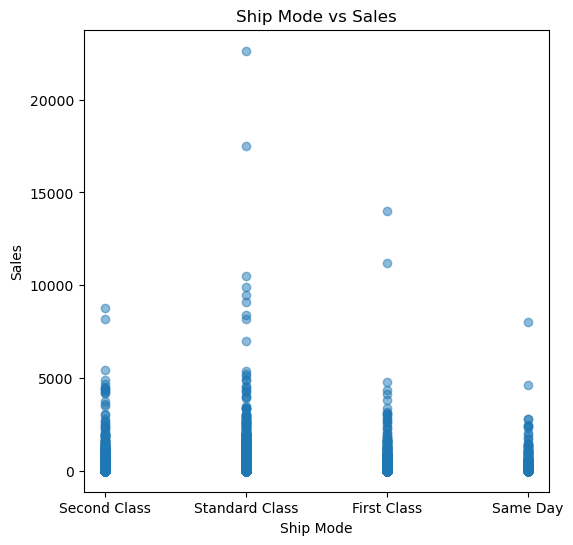

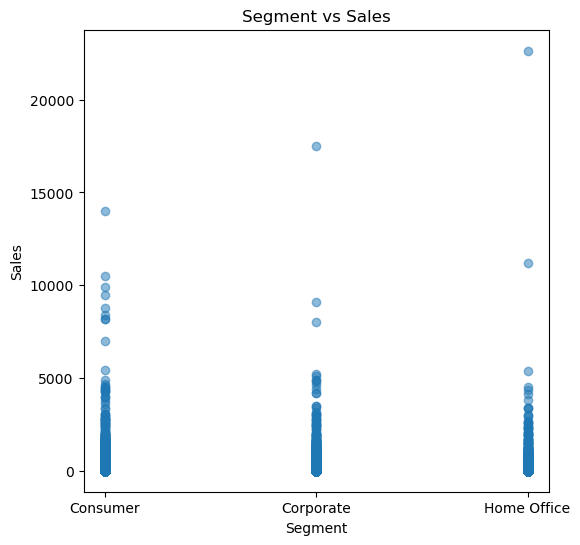

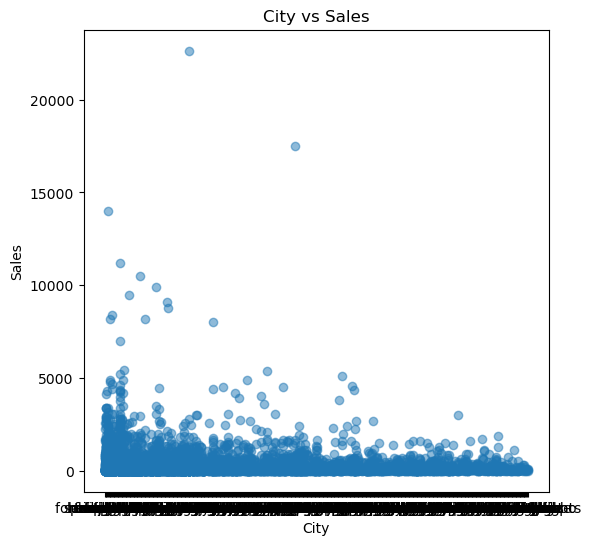

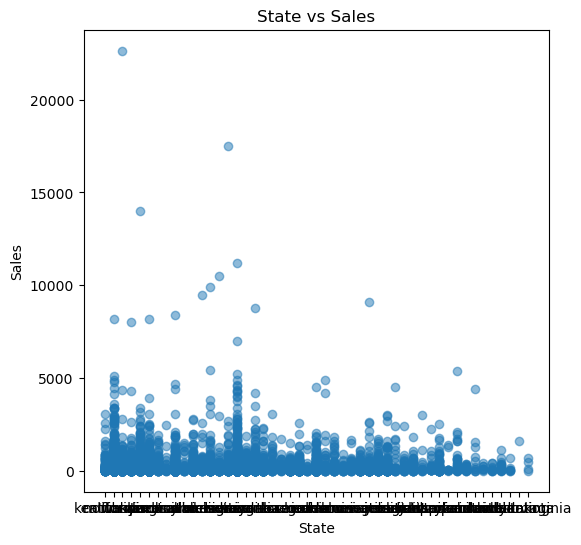

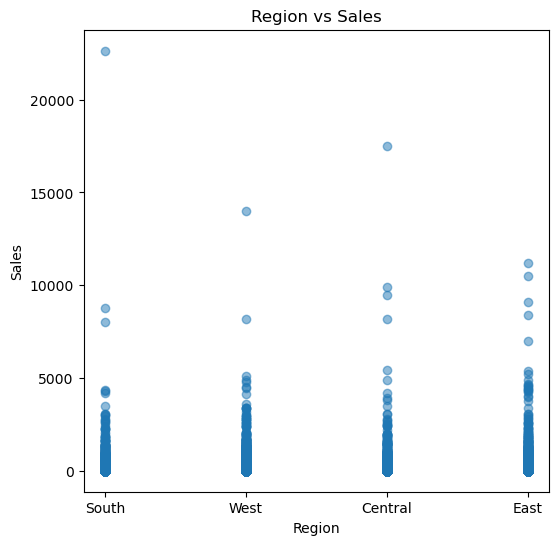

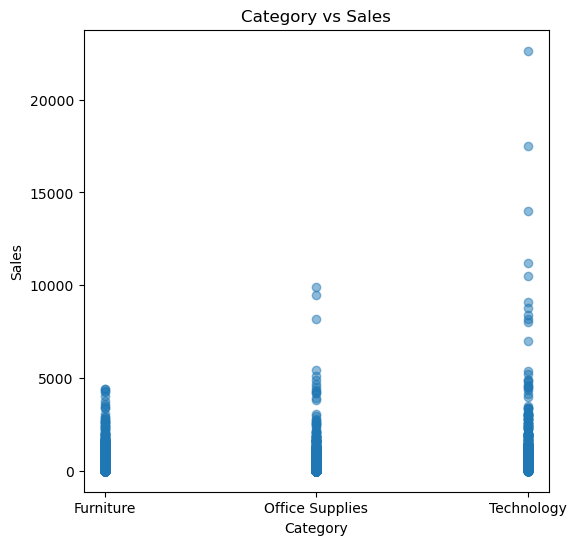

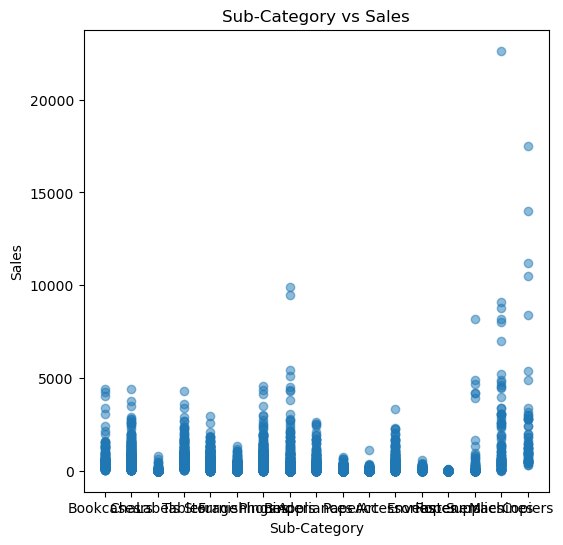

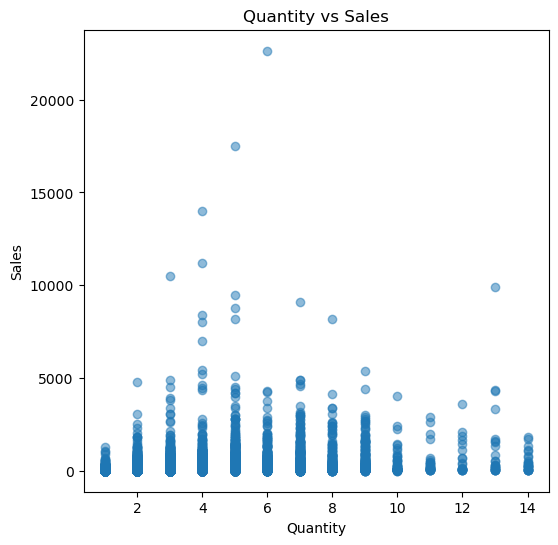

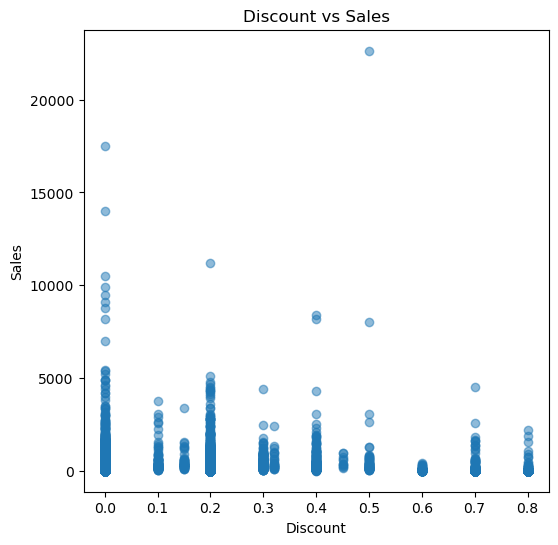

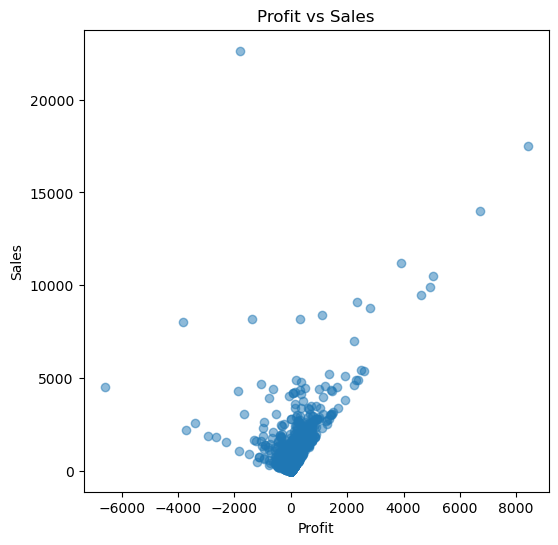

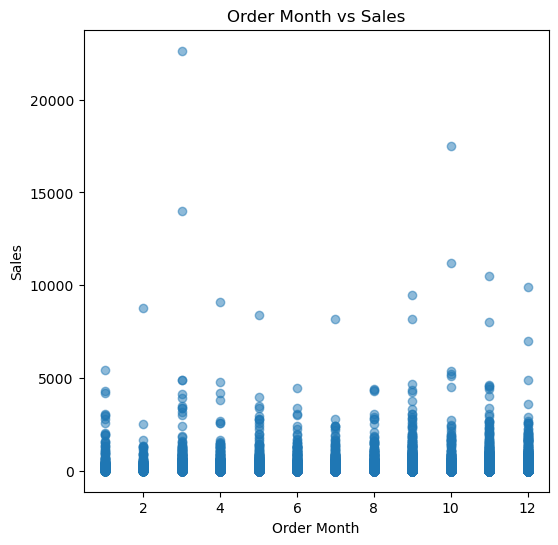

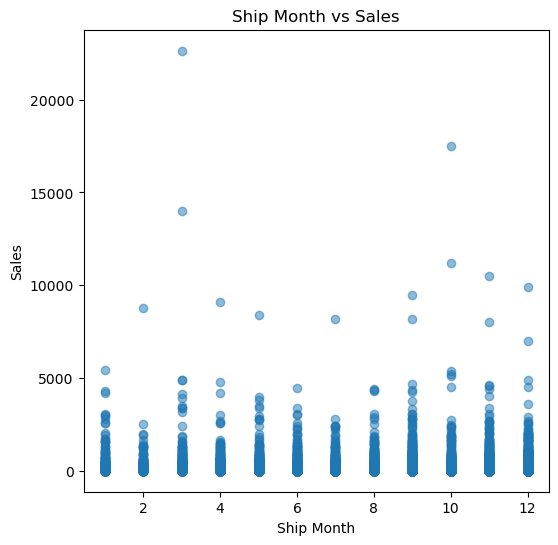

In [16]:
for col in data.columns:
    if col != 'Sales':
        fig = plt.figure(figsize=(6, 6))
        plt.title(f"{col} vs Sales")
        plt.scatter(data[col], data['Sales'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel('Sales')
        plt.show()

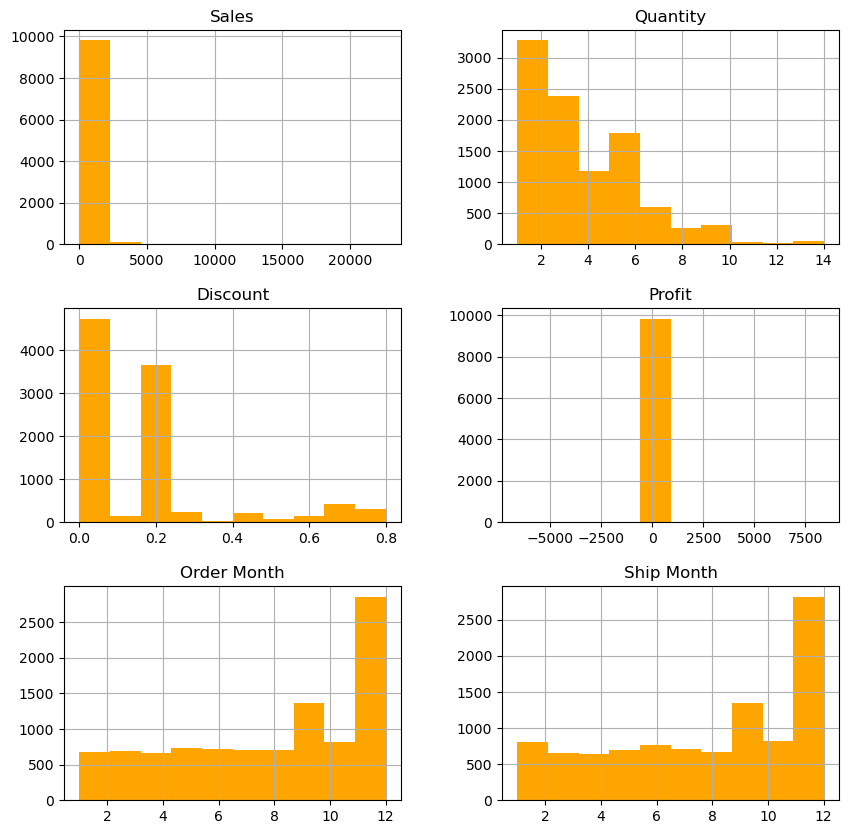

In [17]:
data.hist(figsize=(10, 10), color='orange')
plt.show()

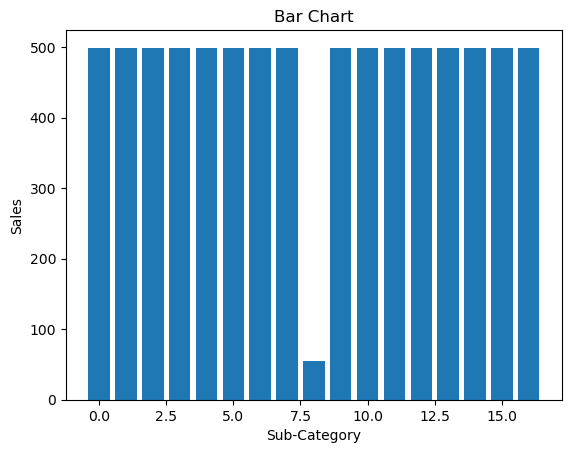

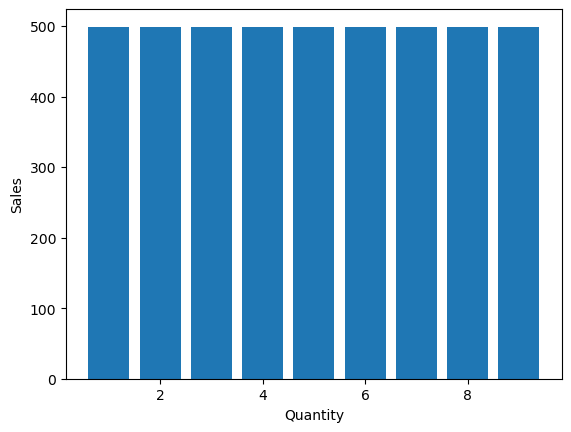

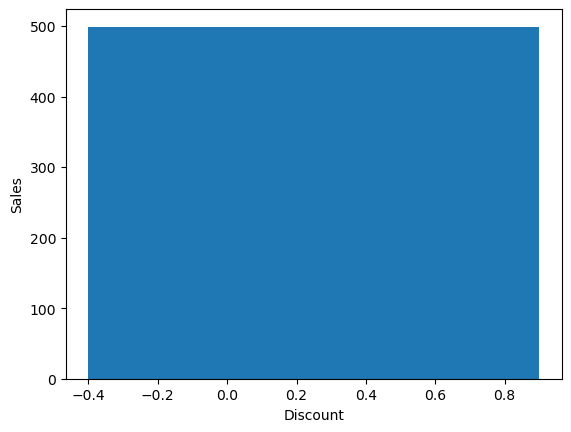

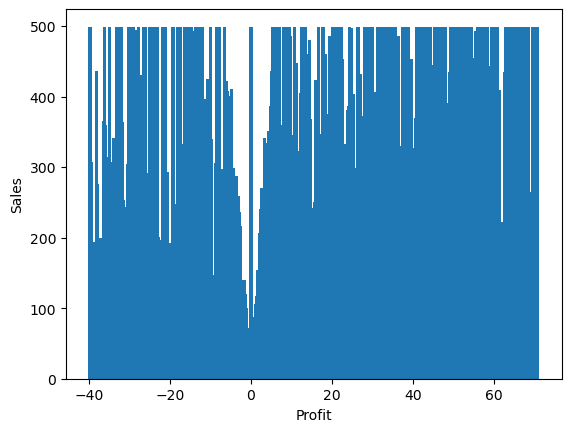

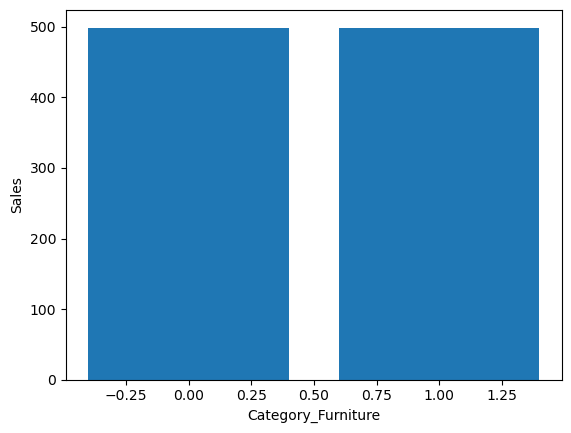

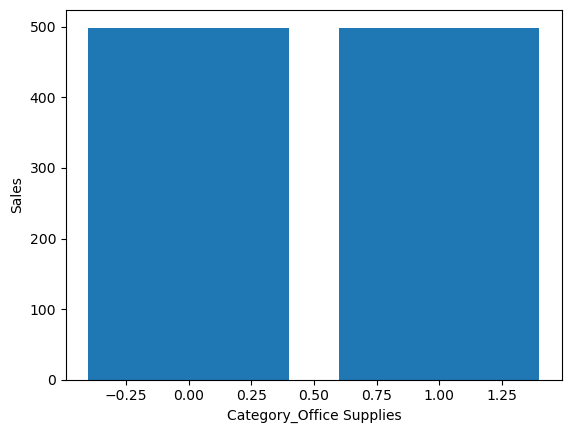

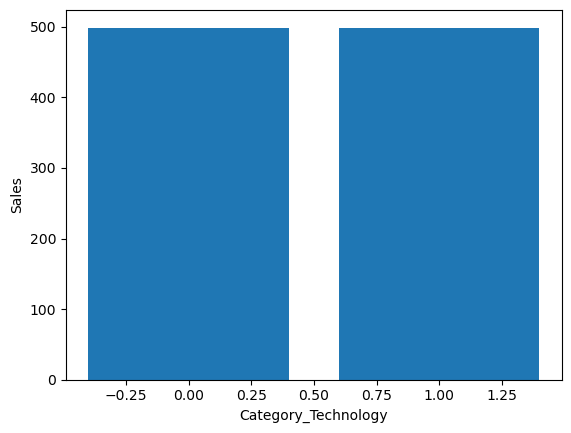

In [44]:
plt.title("Bar Chart")
for col in data.columns:
    if col != 'Sales':
      plt.bar(data[col], data['Sales'])
      plt.xlabel(col)
      plt.ylabel('Sales')
      plt.show()

In [19]:
data.describe(include="all")

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Ship Month
count,9922,9922,9922,9922,9922,9922,9922,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000,9922.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,new york city,california,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN,NaN
freq,5925,5148,902,1987,3182,5977,1516,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.024066,3.790869,0.157034,28.070189,7.807498,7.739972
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619.731401,2.226266,0.206779,231.729393,3.284917,3.341153
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.712025,5.000000,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.780000,3.000000,0.200000,8.627100,9.000000,9.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.364000,11.000000,11.000000


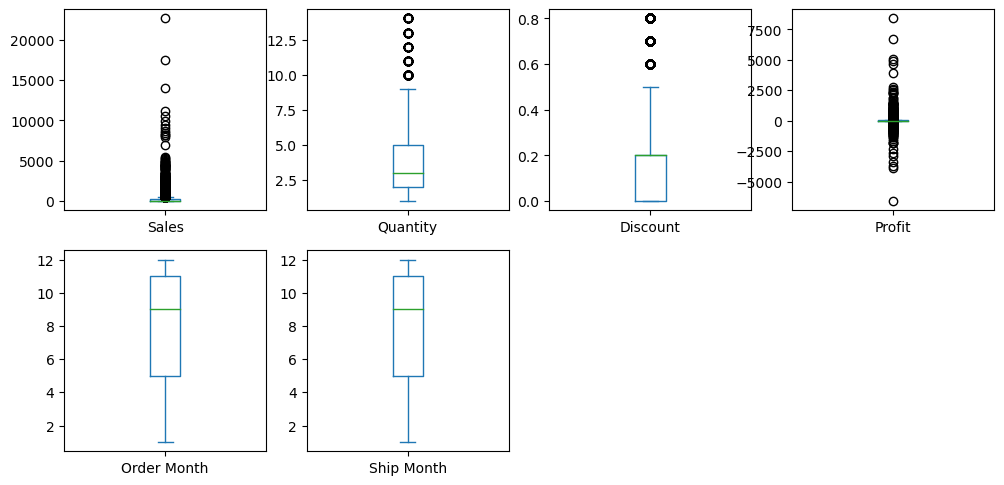

In [20]:
data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
plt.show()

# **Outliers Handling**

In [21]:
cols=["Profit","Sales"]
for col in cols:
     lower=0
     upper=0
     q25, q75 = data[col].quantile(0.25), data[col].quantile(0.75)
     iqr = q75 - q25
     cut_off = iqr * 1.5
     lower, upper = q25 - cut_off, q75 + cut_off
     data[col] = np.clip(data[col], lower, upper)
     #data=data[ data[col] >= lower]
     #data=data[ data[col] <= upper]
cols=["Quantity","Discount"]
for col in cols:
     lower=0
     upper=0
     q25, q75 = data[col].quantile(0.25), data[col].quantile(0.75)
     iqr = q75 - q25
     cut_off = iqr * 1.5
     lower, upper = q25 - cut_off, q75 + cut_off
     #data[col] = np.clip(data[col], lower, upper)
     data=data[ data[col] >= lower]
     data=data[ data[col] <= upper]

<Axes: >

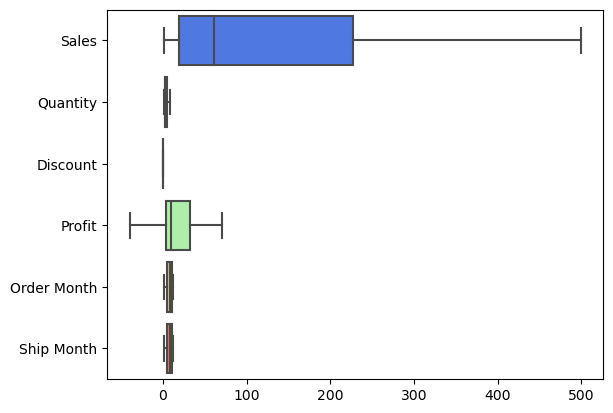

In [22]:
sns.boxplot(data=data,palette='rainbow',orient='h')

# **Features Encoding**

In [23]:
data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Ship Month
0,Second Class,Consumer,henderson,kentucky,South,Furniture,Bookcases,261.960,2,0.00,41.913600,11,11
1,Second Class,Consumer,henderson,kentucky,South,Furniture,Chairs,499.005,3,0.00,70.841963,11,11
2,Second Class,Corporate,los angeles,california,West,Office Supplies,Labels,14.620,2,0.00,6.871400,6,6
3,Standard Class,Consumer,fort lauderdale,florida,South,Furniture,Tables,499.005,5,0.45,-39.765938,10,10
4,Standard Class,Consumer,fort lauderdale,florida,South,Office Supplies,Storage,22.368,2,0.20,2.516400,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,miami,florida,South,Furniture,Furnishings,25.248,3,0.20,4.102800,1,1
9990,Standard Class,Consumer,costa mesa,california,West,Furniture,Furnishings,91.960,2,0.00,15.633200,2,3
9991,Standard Class,Consumer,costa mesa,california,West,Technology,Phones,258.576,2,0.20,19.393200,2,3
9992,Standard Class,Consumer,costa mesa,california,West,Office Supplies,Paper,29.600,4,0.00,13.320000,2,3


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8909 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     8909 non-null   object 
 1   Segment       8909 non-null   object 
 2   City          8909 non-null   object 
 3   State         8909 non-null   object 
 4   Region        8909 non-null   object 
 5   Category      8909 non-null   object 
 6   Sub-Category  8909 non-null   object 
 7   Sales         8909 non-null   float64
 8   Quantity      8909 non-null   int64  
 9   Discount      8909 non-null   float64
 10  Profit        8909 non-null   float64
 11  Order Month   8909 non-null   int64  
 12  Ship Month    8909 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 974.4+ KB


In [25]:
label_encoder = LabelEncoder()
data['Sub-Category'] = label_encoder.fit_transform(data['Sub-Category'])
data['State'] = label_encoder.fit_transform(data['State'])
data['City'] = label_encoder.fit_transform(data['City'])

In [26]:
data=pd.get_dummies(data,drop_first=False,dtype=int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8909 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      8909 non-null   int32  
 1   State                     8909 non-null   int32  
 2   Sub-Category              8909 non-null   int32  
 3   Sales                     8909 non-null   float64
 4   Quantity                  8909 non-null   int64  
 5   Discount                  8909 non-null   float64
 6   Profit                    8909 non-null   float64
 7   Order Month               8909 non-null   int64  
 8   Ship Month                8909 non-null   int64  
 9   Ship Mode_First Class     8909 non-null   int32  
 10  Ship Mode_Same Day        8909 non-null   int32  
 11  Ship Mode_Second Class    8909 non-null   int32  
 12  Ship Mode_Standard Class  8909 non-null   int32  
 13  Segment_Consumer          8909 non-null   int32  
 14  Segment_

# **Correlation**

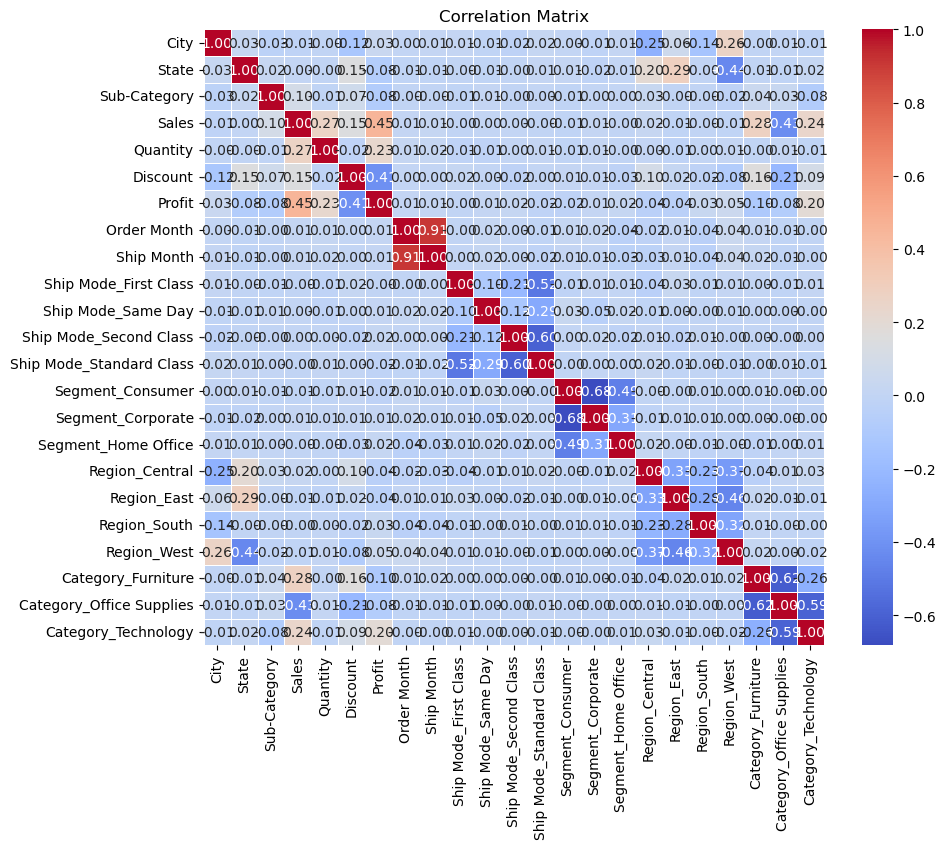

In [28]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [29]:
sales_corr = corr_matrix['Sales']
weak_corr_cols = sales_corr[(sales_corr < 0.08) & (sales_corr > -0.08)].index
data.drop(weak_corr_cols, axis=1, inplace=True)

<Axes: >

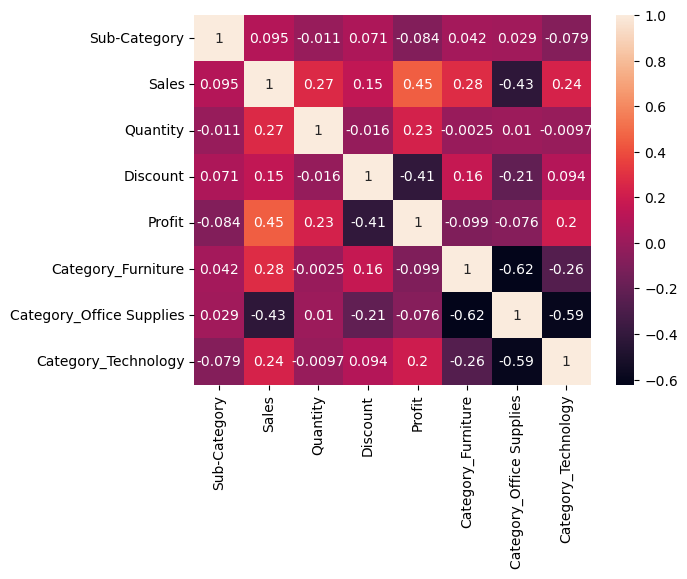

In [30]:
sns.heatmap(data.corr(), annot=True)

# **Models & Normalization**

In [31]:
x=data.drop(["Sales"],axis=1)
y=data['Sales']

In [32]:
scaler_minmax = MinMaxScaler()
X_scaled = scaler_minmax.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [33]:
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
r2_score(y_test,y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 14495.259408211523
R-squared: 0.49483553024976934


In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4107.085561342762
R-squared: 0.8568667423337589


In [35]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(x_train, y_train)
y_pred = tree_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5925.976956961518
R-squared: 0.7934777900201159


# **Time Series**

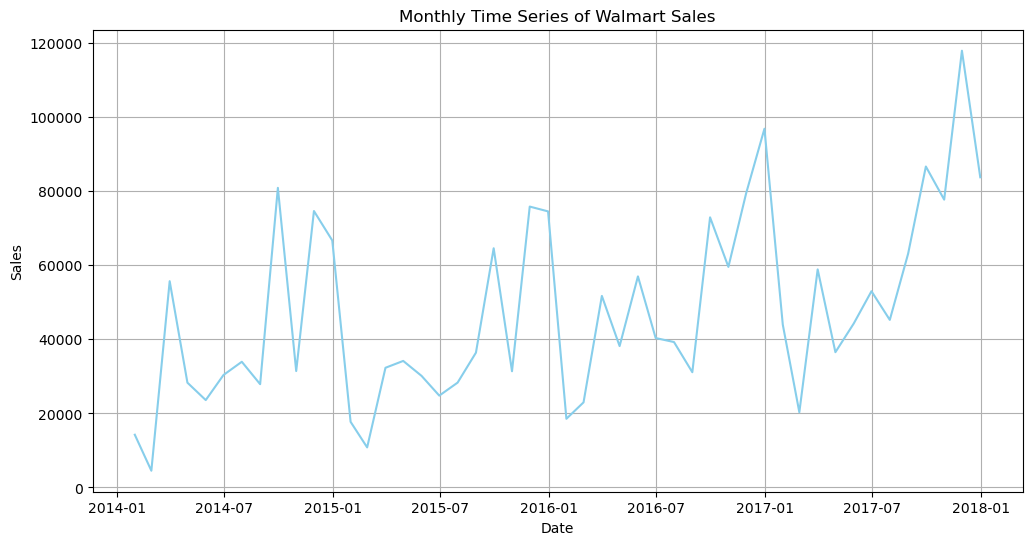

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('TimeSeries.csv', encoding='windows-1254')

# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index
df.sort_values('Order Date', inplace=True)
df.set_index('Order Date', inplace=True)

# Resample to get monthly sales
monthly_sales =df['Sales'].resample('M').sum()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, color='skyblue')
plt.title('Monthly Time Series of Walmart Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [3]:
# Step 2: Stationarize the series
def stationarize_series(series):
 # Calculate rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))
    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is not stationary")

# # Apply stationarize_series
# stationarize_series(monthly_sales)

# # We will choose 1st order differencing because it is near to stationary
# stationarize_series(monthly_sales.diff().dropna())


# # Finding the value of the d parameter
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# # Original Series
# fig, (ax1, ax2, ax3) = plt.subplots(3)
# ax1.plot(monthly_sales); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# # 1st Differencing
# ax2.plot(monthly_sales.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# # 2nd Differencing
# ax3.plot(monthly_sales.diff().diff()); ax3.set_title('2nd Order Differencing')
# plt.show()


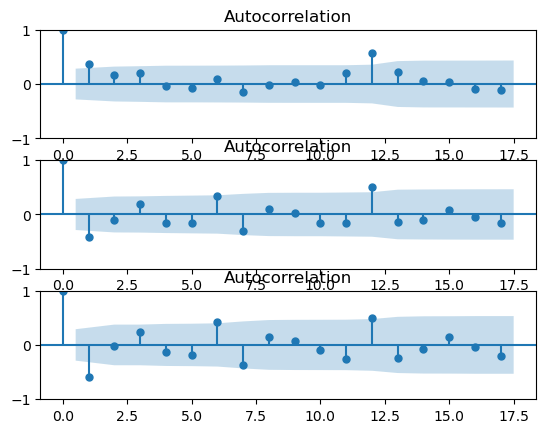

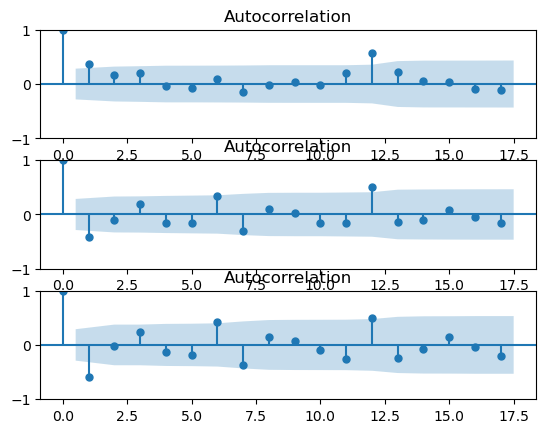

In [4]:
#step 3
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1,ax2,ax3) = plt.subplots(3)
plot_acf(monthly_sales,ax=ax1)
plot_acf(monthly_sales.diff().dropna(),ax=ax2)
plot_acf(monthly_sales.diff().diff().dropna(),ax=ax3)

C:\Users\Afaf\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


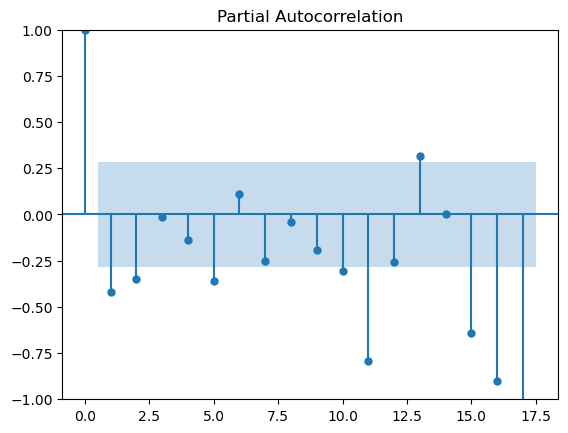

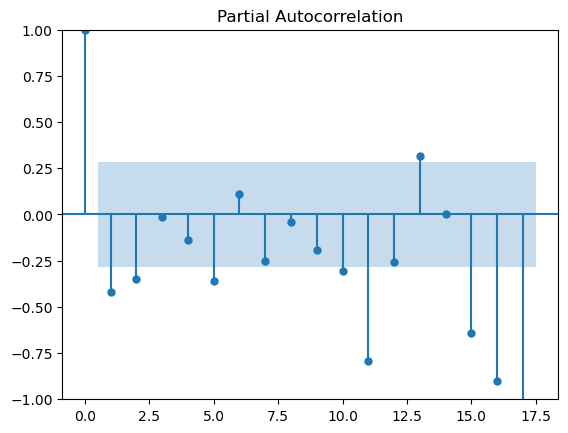

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(monthly_sales.diff().dropna())

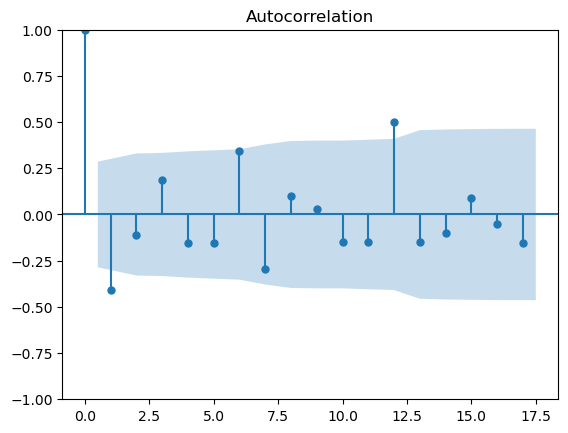

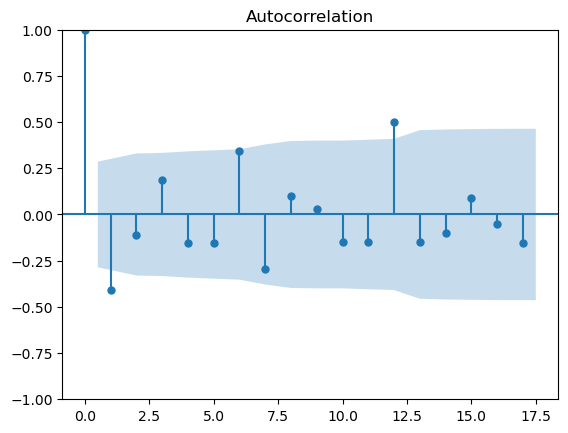

In [6]:
# Finding the value of the q parameter
plot_acf(monthly_sales.diff().dropna())

In [8]:
# step 4
model = ARIMA(monthly_sales,order=(1,0,1)) 
arima_model = model.fit()
print(arima_model.summary())
#step 5
forecast = arima_model.predict()
monthly_forecast = forecast.resample('M').sum()


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -538.833
Date:                Sun, 19 May 2024   AIC                           1087.666
Time:                        10:21:26   BIC                           1096.917
Sample:                    01-31-2014   HQIC                          1091.147
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2617      0.488      0.536      0.592      -0.696       1.219
ar.L2          0.0655      0.370      0.177      0.860      -0.660       0.791
ar.L3          0.1086      0.348      0.312      0.7

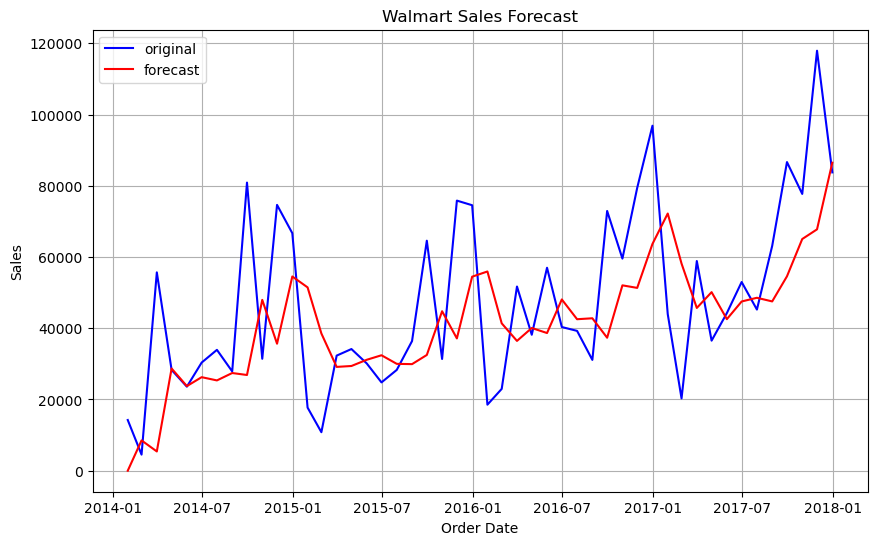

In [9]:

plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index,monthly_sales,label='original',color='blue')
plt.plot(monthly_forecast.index,monthly_forecast,label='forecast',color='red')
plt.title('Walmart Sales Forecast')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()



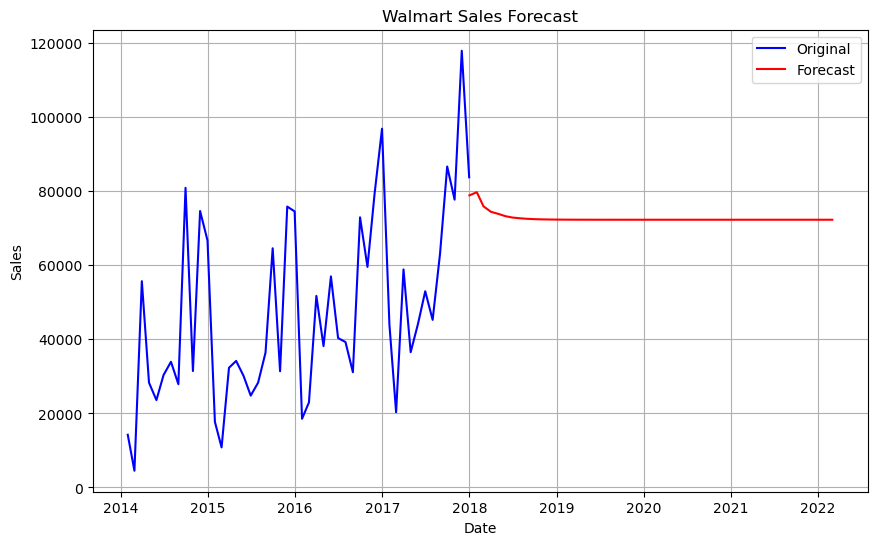

In [10]:
# ARIMA forecast from 2018-01-01 to 2023-01-01
start_index = '2018-01-01'
end_index = '2022-03-11'
forecast = arima_model.predict(start=start_index, end=end_index, dynamic=False)

monthly_forecast = forecast.resample('M').sum()

# Create date range for the forecast
forecast_dates = pd.date_range(start=start_index, end=end_index, freq='MS')

# Plot the original monthly sales and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Original', color='blue')
plt.plot(forecast_dates, monthly_forecast, label='Forecast', color='red')
plt.title('Walmart Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()